# Feature Engineering

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN 
import itertools

In [2]:
df = pd.read_pickle(r'C:\DataScience\PROJECT_AFIMILK\Data\Flat_File_for_cleansing\df_after_cleansing.p')
df_orig = pd.read_pickle(r'C:\DataScience\PROJECT_AFIMILK\Data\Flat_File_for_cleansing\df_for_cleansing.p')

In [3]:
df.head()

,CowID,FarmCowID,BirthDate,CalvingDate,Cur_Date,CurrentConceivedDate,TenDaysAvgECM_KG_t1_cat,DailyRestTime_t6_cat,DailyRestTime_t5_cat,DailyRestTime_t3_cat,...,DailyRestRestlessness_t6i,DailyRestPerBout_t3i,DailyRestTime_t6i,DailyRestRestlessness_t5i,DailyRestPerBout_t2i,DailyRestRatio_t4i,DailyRestRestlessness_t3i,DailyRestRestlessness_t4i,DailyRestBout_t4i,DailyRestRestlessness_t1i
0,1,1241,2017-12-26,2020-02-19,2020-02-20,1900-01-01,4.0,8.0,9.0,10.0,...,-1.0,5.0,21.0,-3.0,1.5,4.0,1.5,-2.5,1.0,16.0
1,1,1241,2017-12-26,2021-02-20,2021-02-21,1900-01-01,5.0,10.0,1.0,10.0,...,0.0,3.5,25.5,10.0,5.5,1.5,2.0,-2.0,-0.5,1.0
2,10,12410,2017-12-31,2020-01-14,2020-01-15,1900-01-01,3.0,5.0,10.0,10.0,...,-6.5,-4.5,-21.5,0.5,8.0,0.5,-6.0,-2.0,1.0,-1.0
3,10,12410,2017-12-31,2021-01-08,2021-01-09,1900-01-01,1.0,10.0,5.0,7.0,...,2.5,-7.5,-20.5,0.0,-1.0,-2.0,-3.0,0.0,1.5,-5.5
4,1000,1241000,2017-12-25,2020-02-18,2020-02-19,1900-01-01,3.0,10.0,10.0,10.0,...,4.5,6.0,60.0,1.5,-1.0,-0.5,1.0,3.0,0.5,-3.5


In [4]:
dbscan_list = [('DailyRestRestlessness_t1','DailyRestRatio_t1')
              ,('DailyProdRate_t5','DailyRestRatio_t5')
              ,('DailyProdRate_t5','DailyRestTime_t5')
              ,('DailyMilkingTime_t4','DailyRestRatio_t4')
              ,('DailyMilkingTime_t4','DailyRestRatio_t5')
              ,('DailyActivity_t4','DailyRestRatio_t4')
              ,('DailyRestTime_t4','DailyActivity_t4')
              ,('DailyRestRestlessness_t4','DailyRestRatio_t4')
              ,('DailyRestRatio_t4','DailyRestPerBout_t4')
              ,('DailyRestRestlessness_t4','DailyRestTime_t4')
              ,('DailyRestBout_t4','DailyRestPerBout_t4')
             ]


In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3346 entries, 0 to 3436
Data columns (total 235 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   CowID                             object 
 1   FarmCowID                         object 
 2   BirthDate                         object 
 3   CalvingDate                       object 
 4   Cur_Date                          object 
 5   CurrentConceivedDate              object 
 6   TenDaysAvgECM_KG_t1_cat           float64
 7   DailyRestTime_t6_cat              float64
 8   DailyRestTime_t5_cat              float64
 9   DailyRestTime_t3_cat              float64
 10  DailyRestRestlessness_t5_cat      float64
 11  DailyRestRestlessness_t3_cat      float64
 12  DailyRestRestlessness_t1_cat      float64
 13  DailyRestRatio_t5_cat             float64
 14  DailyRestRatio_t3_cat             float64
 15  DailyRestTime_t7                  Int64  
 16  DailyRestBout                     float64

## DBSCAN - Create new features

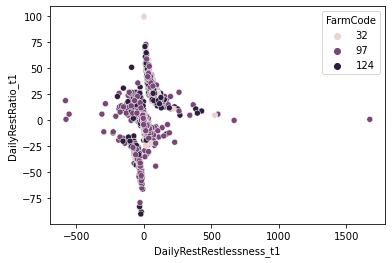

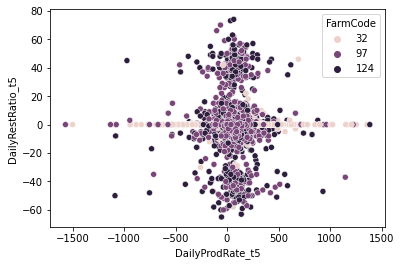

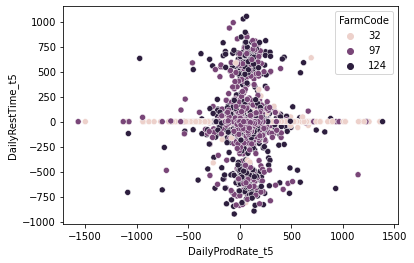

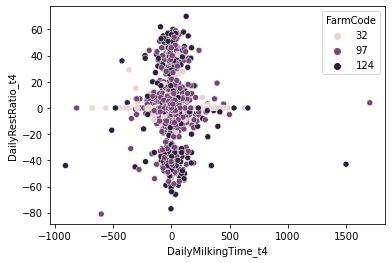

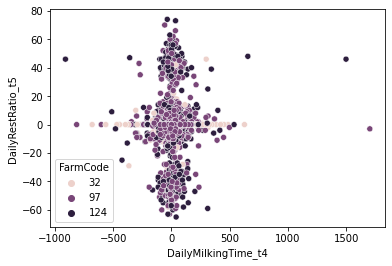

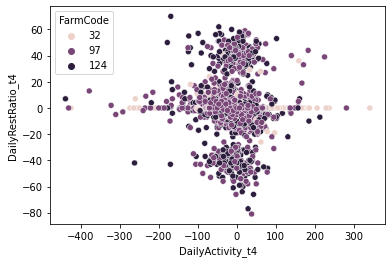

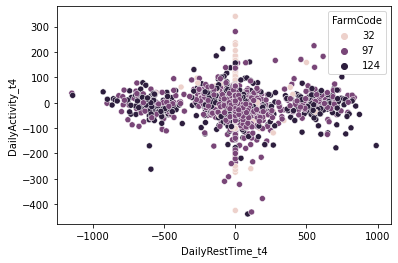

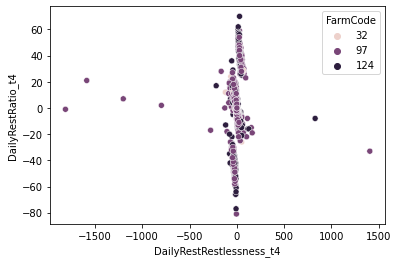

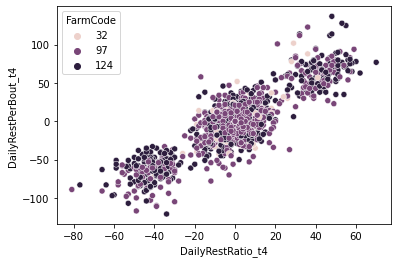

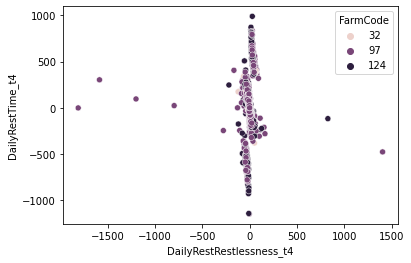

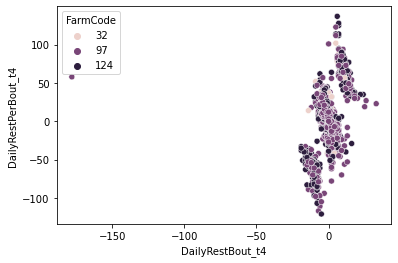

In [6]:
### DBSCAN - ליצור קבוצות DBSCAN 
## להריץ מודל של עץ החלטות עם 3 קטגוריות למציאת העמודה במידע חדש.
for c1,c2 in dbscan_list:
    sns.scatterplot(x = c1 , y = c2, data = df_orig, hue = 'FarmCode')
    plt.show()


In [7]:
def get_dbscan(df, c1, c2, eps= 3, min_samples= 10):
    X = pd.DataFrame()
    X = df[[c1,c2]]
    mod = DBSCAN(eps= eps, min_samples= min_samples).fit(X)
    l = list(mod.labels_)
    #print(dict((i, l.count(i)) for i in l))
    return mod.labels_ , len(set(l)), l.count(-1)

In [8]:
import warnings
warnings.filterwarnings('ignore')
def get_min_dbscan(df_orig, v1, v2, eps_range ,min_sample_range, groups = 4):
    results = []
    min_inv = 1000
    min_epc = 1000
    min_samples = 1000
    res = []
    print(v1,v2)
    for i in eps_range:
        for j in min_sample_range:
            print(i,j)
            labels, clst_num ,inv = get_dbscan(df= df_orig, c1= v1, c2= v2, eps= i, min_samples= j)
            if (clst_num == groups) & (inv < min_inv):
                min_inv = inv
                min_epc = i
                min_samples = j
                print('New Min: ', inv, i, j)
                res = {'var1'         : v1,
                       'var2'         : v2,
                       'min_inv'      : min_inv, 
                       'min_epc'      : min_epc, 
                       'min_samples'  : min_samples}
                results.append(res) 
                X = df_orig[[v1,v2]].copy()
                X['labels'] = labels
                sns.scatterplot(x= v1 , y= v2, data= X, hue= 'labels', legend= True)
                plt.show()
    return pd.DataFrame(results) 

DailyRestRestlessness_t1 DailyRestRatio_t1
10 15
New Min:  139 10 15


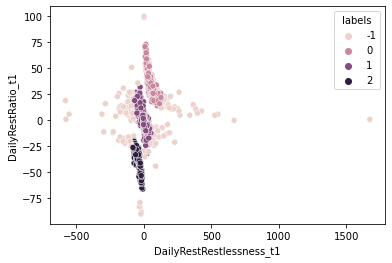

10 16
10 17
10 18
10 19
10 20
10 21
10 22
10 23
10 24
11 15
New Min:  127 11 15


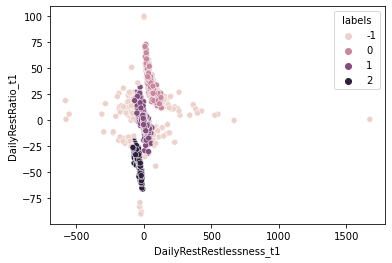

11 16
11 17
11 18
11 19
11 20
11 21
11 22
11 23
11 24
12 15
12 16
New Min:  119 12 16


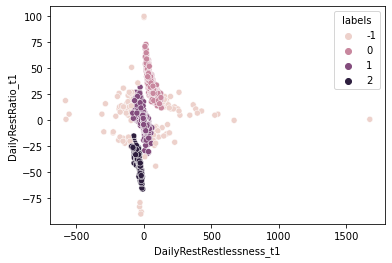

12 17
12 18
12 19
12 20
12 21
12 22
12 23
12 24
13 15
New Min:  97 13 15


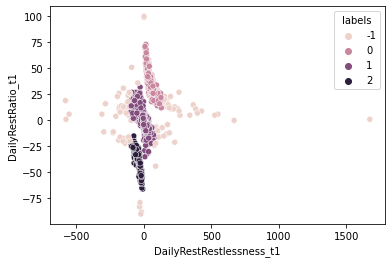

13 16
13 17
13 18
13 19
13 20
13 21
13 22
13 23
13 24
14 15
New Min:  90 14 15


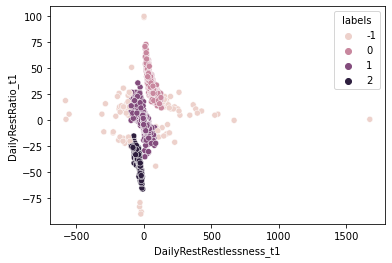

14 16
14 17
14 18
14 19
14 20
14 21
14 22
14 23
14 24
15 15
New Min:  87 15 15


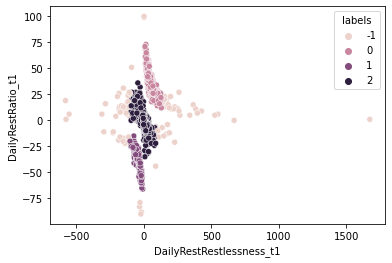

15 16
15 17
15 18
15 19
15 20
15 21
15 22
15 23
15 24
16 15
New Min:  84 16 15


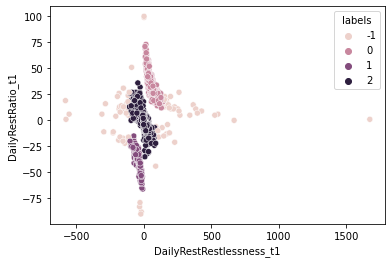

16 16
16 17
16 18
16 19
16 20
16 21
16 22
16 23
16 24
17 15
New Min:  83 17 15


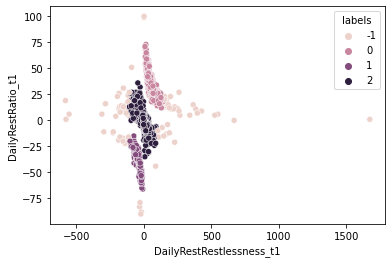

17 16
17 17
17 18
17 19
17 20
17 21
17 22
17 23
17 24
18 15
18 16
18 17
18 18
18 19
18 20
18 21
18 22
18 23
18 24
19 15
19 16
19 17
19 18
19 19
19 20
19 21
19 22
19 23
19 24


,var1,var2,min_inv,min_epc,min_samples
0,DailyRestRestlessness_t1,DailyRestRatio_t1,139,10,15
1,DailyRestRestlessness_t1,DailyRestRatio_t1,127,11,15
2,DailyRestRestlessness_t1,DailyRestRatio_t1,119,12,16
3,DailyRestRestlessness_t1,DailyRestRatio_t1,97,13,15
4,DailyRestRestlessness_t1,DailyRestRatio_t1,90,14,15
5,DailyRestRestlessness_t1,DailyRestRatio_t1,87,15,15
6,DailyRestRestlessness_t1,DailyRestRatio_t1,84,16,15
7,DailyRestRestlessness_t1,DailyRestRatio_t1,83,17,15


In [9]:
##dbscan_list[0]
get_min_dbscan(df_orig, v1= dbscan_list[0][0], v2= dbscan_list[0][1], eps_range= range(10,20,1), min_sample_range= range(15,25,1))
## 17,15

In [10]:
labels, groups, inv = get_dbscan(df=df_orig, c1=dbscan_list[0][0], c2=dbscan_list[0][1],eps=17,min_samples=15)
a = pd.DataFrame(labels, index=df_orig.index, columns=['dbscan0'])
print(a.value_counts())
print(a.index)
df = df.merge(right= a, how='left', left_index= True, right_index=True)
print(df.shape)

dbscan0
 2         2728
 0          469
 1          157
-1           83
dtype: int64
RangeIndex(start=0, stop=3437, step=1)
(3346, 236)


DailyProdRate_t5 DailyRestRatio_t5
10 20
10 21
10 22
10 23
10 24
10 25
10 26
10 27
10 28
10 29
11 20
New Min:  653 11 20


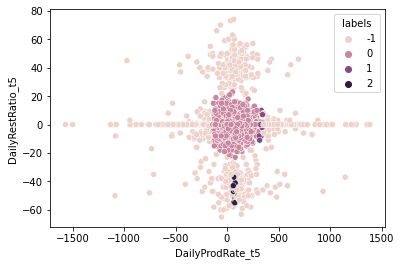

11 21
11 22
11 23
11 24
11 25
11 26
11 27
11 28
11 29
12 20
12 21
12 22
New Min:  641 12 22


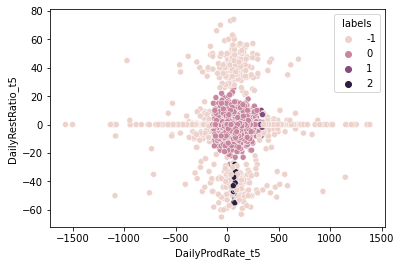

12 23
12 24
12 25
12 26
12 27
12 28
12 29
13 20
13 21
13 22
13 23
New Min:  613 13 23


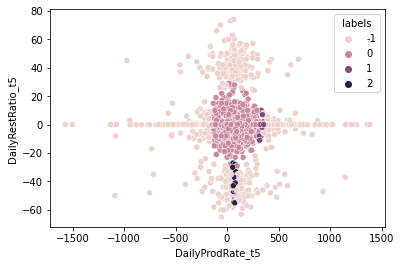

13 24
13 25
13 26
13 27
13 28
13 29
14 20
14 21
14 22
14 23
14 24
14 25
New Min:  597 14 25


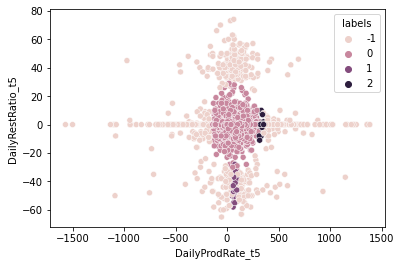

14 26
14 27
14 28
14 29
15 20
15 21
15 22
15 23
15 24
15 25
New Min:  523 15 25


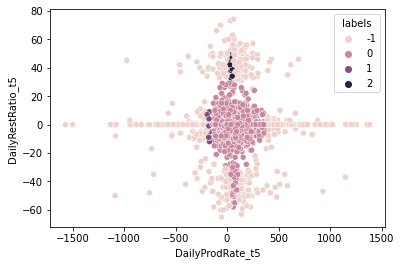

15 26
15 27
15 28
15 29
16 20
16 21
New Min:  424 16 21


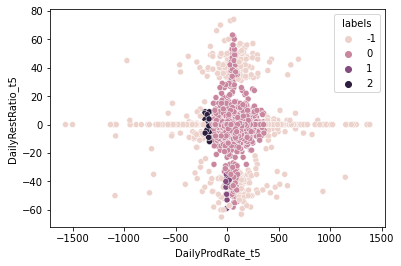

16 22
16 23
16 24
16 25
16 26
16 27
16 28
16 29
17 20
17 21
17 22
17 23
17 24
17 25
17 26
17 27
17 28
17 29
18 20
18 21
18 22
18 23
New Min:  379 18 23


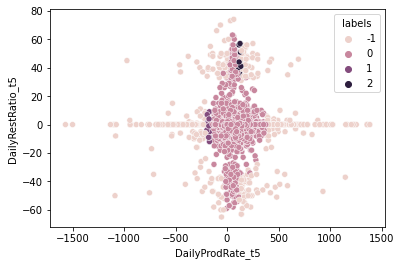

18 24
18 25
18 26
18 27
18 28
18 29
19 20
New Min:  279 19 20


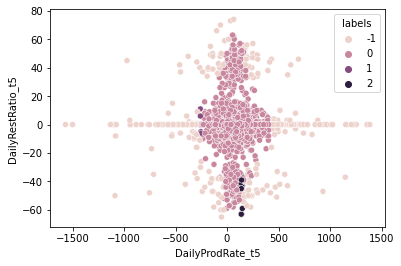

19 21
19 22
19 23
19 24
19 25
19 26
19 27
19 28
19 29


,var1,var2,min_inv,min_epc,min_samples
0,DailyProdRate_t5,DailyRestRatio_t5,653,11,20
1,DailyProdRate_t5,DailyRestRatio_t5,641,12,22
2,DailyProdRate_t5,DailyRestRatio_t5,613,13,23
3,DailyProdRate_t5,DailyRestRatio_t5,597,14,25
4,DailyProdRate_t5,DailyRestRatio_t5,523,15,25
5,DailyProdRate_t5,DailyRestRatio_t5,424,16,21
6,DailyProdRate_t5,DailyRestRatio_t5,379,18,23
7,DailyProdRate_t5,DailyRestRatio_t5,279,19,20


In [11]:
##dbscan_list[1]
get_min_dbscan(df_orig, v1=dbscan_list[1][0], v2= dbscan_list[1][1], eps_range= range(10,20,1), min_sample_range= range(20,30,1))
##None

DailyProdRate_t5 DailyRestTime_t5
85 18
85 19
85 20
New Min:  152 85 20


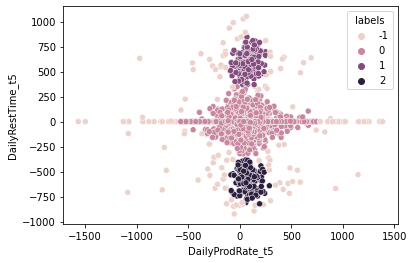

85 21
86 18
86 19
86 20
New Min:  150 86 20


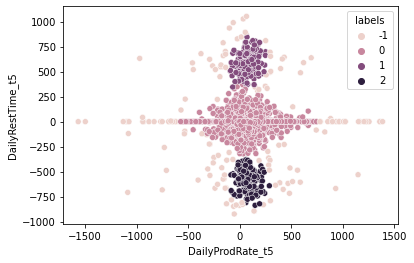

86 21
87 18
87 19
87 20
New Min:  149 87 20


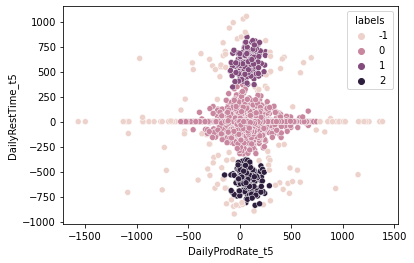

87 21
88 18
88 19
88 20
New Min:  147 88 20


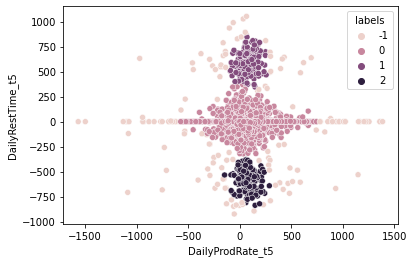

88 21
89 18
89 19
89 20
89 21
90 18
90 19
90 20
90 21
91 18
91 19
91 20
91 21


,var1,var2,min_inv,min_epc,min_samples
0,DailyProdRate_t5,DailyRestTime_t5,152,85,20
1,DailyProdRate_t5,DailyRestTime_t5,150,86,20
2,DailyProdRate_t5,DailyRestTime_t5,149,87,20
3,DailyProdRate_t5,DailyRestTime_t5,147,88,20


In [12]:
##dbscan_list[2]
get_min_dbscan(df_orig, v1=dbscan_list[2][0], v2= dbscan_list[2][1], eps_range= range(85,92,1), min_sample_range= range(18,22,1))
## 88 20

In [13]:
labels, groups, inv = get_dbscan(df=df_orig, c1=dbscan_list[2][0], c2=dbscan_list[2][1],eps=88,min_samples=20)
a = pd.DataFrame(labels, index=df_orig.index, columns=['dbscan2'])
print(a.value_counts())
print(a.index)
df = df.merge(right= a, how='left', left_index= True, right_index=True)
print(df.shape)

dbscan2
 0         2969
 2          163
 1          158
-1          147
dtype: int64
RangeIndex(start=0, stop=3437, step=1)
(3346, 237)


DailyMilkingTime_t4 DailyRestRatio_t4
8 15
8 16
8 17
8 18
8 19
8 20
New Min:  533 8 20


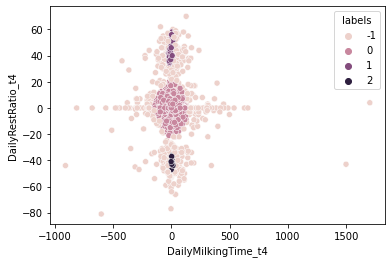

9 15
New Min:  357 9 15


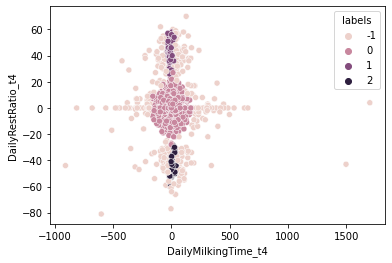

9 16
9 17
9 18
9 19
9 20
10 15
10 16
10 17
10 18
New Min:  354 10 18


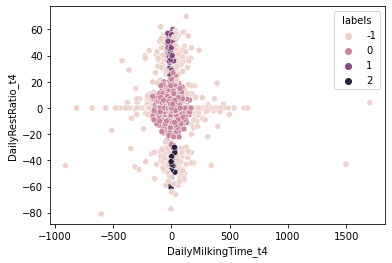

10 19
10 20
11 15
11 16
New Min:  263 11 16


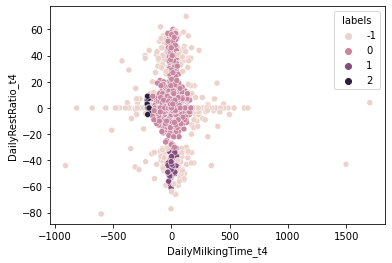

11 17
11 18
11 19
11 20


,var1,var2,min_inv,min_epc,min_samples
0,DailyMilkingTime_t4,DailyRestRatio_t4,533,8,20
1,DailyMilkingTime_t4,DailyRestRatio_t4,357,9,15
2,DailyMilkingTime_t4,DailyRestRatio_t4,354,10,18
3,DailyMilkingTime_t4,DailyRestRatio_t4,263,11,16


In [14]:
##dbscan_list[3]
get_min_dbscan(df_orig, v1=dbscan_list[3][0], v2= dbscan_list[3][1], eps_range= range(8,12,1), min_sample_range= range(15,21,1))
## None

In [15]:
## dbscan_list[4]
get_min_dbscan(df_orig, v1=dbscan_list[4][0], v2= dbscan_list[4][1], eps_range= range(30,100,5), min_sample_range= range(5,100,5))
##None

DailyMilkingTime_t4 DailyRestRatio_t5
30 5
30 10
30 15
30 20
30 25
30 30
30 35
30 40
30 45
30 50
30 55
30 60
30 65
30 70
30 75
30 80
30 85
30 90
30 95
35 5
35 10
35 15
35 20
35 25
35 30
35 35
35 40
35 45
35 50
35 55
35 60
35 65
35 70
35 75
35 80
35 85
35 90
35 95
40 5
40 10
40 15
40 20
40 25
40 30
40 35
40 40
40 45
40 50
40 55
40 60
40 65
40 70
40 75
40 80
40 85
40 90
40 95
45 5
45 10
45 15
45 20
45 25
45 30
45 35
45 40
45 45
45 50
45 55
45 60
45 65
45 70
45 75
45 80
45 85
45 90
45 95
50 5
50 10
50 15
50 20
50 25
50 30
50 35
50 40
50 45
50 50
50 55
50 60
50 65
50 70
50 75
50 80
50 85
50 90
50 95
55 5
55 10
55 15
55 20
55 25
55 30
55 35
55 40
55 45
55 50
55 55
55 60
55 65
55 70
55 75
55 80
55 85
55 90
55 95
60 5
60 10
60 15
60 20
60 25
60 30
60 35
60 40
60 45
60 50
60 55
60 60
60 65
60 70
60 75
60 80
60 85
60 90
60 95
65 5
65 10
65 15
65 20
65 25
65 30
65 35
65 40
65 45
65 50
65 55
65 60
65 65
65 70
65 75
65 80
65 85
65 90
65 95
70 5
70 10
70 15
70 20
70 25
70 30
70 35
70 40
70 45
70 50

""


DailyActivity_t4 DailyRestRatio_t4
10 45
10 46
10 47
10 48
10 49
10 50
10 51
10 52
10 53
10 54
11 45
11 46
11 47
11 48
11 49
11 50
11 51
11 52
11 53
11 54
12 45
New Min:  391 12 45


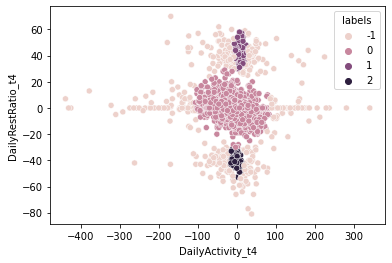

12 46
12 47
12 48
12 49
12 50
12 51
12 52
12 53
12 54
13 45
New Min:  305 13 45


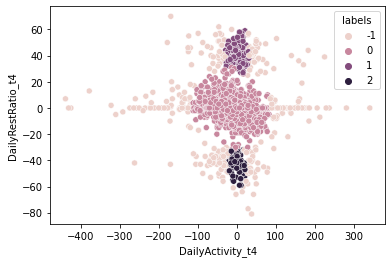

13 46
13 47
13 48
13 49
13 50
13 51
13 52
13 53
13 54
14 45
14 46
14 47
New Min:  276 14 47


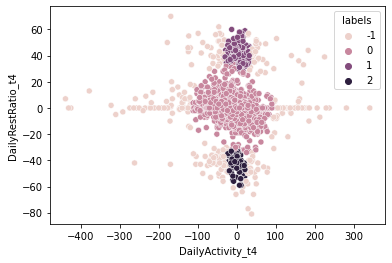

14 48
14 49
14 50
14 51
14 52
14 53
14 54
15 45
15 46
15 47
15 48
15 49
15 50
15 51
15 52
15 53
15 54
16 45
16 46
16 47
16 48
16 49
16 50
16 51
16 52
16 53
16 54
17 45
17 46
17 47
17 48
17 49
17 50
17 51
17 52
17 53
17 54
18 45
18 46
18 47
18 48
18 49
18 50
18 51
18 52
18 53
18 54
19 45
19 46
19 47
19 48
19 49
19 50
19 51
19 52
19 53
19 54


,var1,var2,min_inv,min_epc,min_samples
0,DailyActivity_t4,DailyRestRatio_t4,391,12,45
1,DailyActivity_t4,DailyRestRatio_t4,305,13,45
2,DailyActivity_t4,DailyRestRatio_t4,276,14,47


In [16]:
##dbscan_list[5]
get_min_dbscan(df_orig, v1=dbscan_list[5][0], v2= dbscan_list[5][1], eps_range= range(10,20,1), min_sample_range= range(45,55,1))
# 14 47

In [17]:
labels, groups, inv = get_dbscan(df=df_orig, c1=dbscan_list[5][0], c2=dbscan_list[5][1],eps=14,min_samples=47)
a = pd.DataFrame(labels, index=df_orig.index, columns=['dbscan5'])
print(a.value_counts())
print(a.index)
df = df.merge(right= a, how='left', left_index= True, right_index=True)
print(df.shape)

dbscan5
 0         2949
-1          276
 1          128
 2           84
dtype: int64
RangeIndex(start=0, stop=3437, step=1)
(3346, 238)


DailyRestTime_t4 DailyActivity_t4
45 10
New Min:  69 45 10


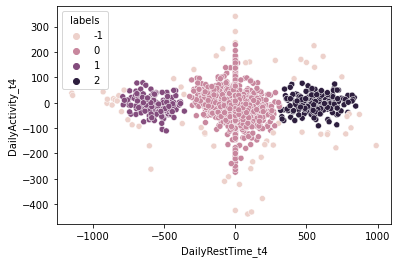

45 11
45 12
45 13
45 14
45 15
45 16
45 17
45 18
45 19
46 10
New Min:  68 46 10


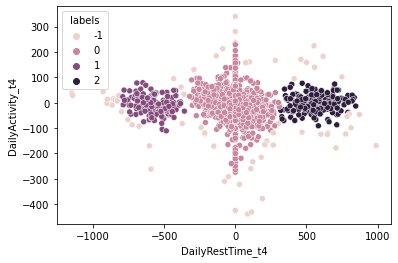

46 11
46 12
46 13
46 14
46 15
46 16
46 17
46 18
46 19
47 10
New Min:  61 47 10


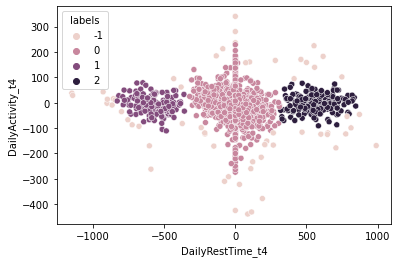

47 11
47 12
47 13
47 14
47 15
47 16
47 17
47 18
47 19
48 10
New Min:  57 48 10


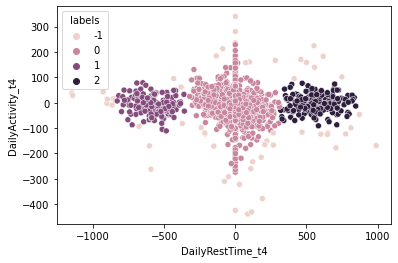

48 11
48 12
48 13
48 14
48 15
48 16
48 17
48 18
48 19
49 10
49 11
49 12
49 13
49 14
49 15
49 16
49 17
49 18
49 19
50 10
50 11
50 12
50 13
50 14
50 15
50 16
50 17
50 18
50 19
51 10
51 11
51 12
51 13
51 14
51 15
51 16
51 17
51 18
51 19
52 10
52 11
52 12
52 13
52 14
52 15
52 16
52 17
52 18
52 19
53 10
53 11
53 12
53 13
53 14
53 15
53 16
53 17
53 18
53 19
54 10
54 11
54 12
54 13
54 14
54 15
54 16
54 17
54 18
54 19
55 10
55 11
55 12
55 13
55 14
55 15
55 16
55 17
55 18
55 19
56 10
56 11
56 12
56 13
56 14
56 15
56 16
56 17
56 18
56 19
57 10
57 11
57 12
57 13
57 14
57 15
57 16
57 17
57 18
57 19
58 10
58 11
58 12
58 13
58 14
58 15
58 16
58 17
58 18
58 19
59 10
59 11
59 12
59 13
59 14
59 15
59 16
59 17
59 18
59 19


,var1,var2,min_inv,min_epc,min_samples
0,DailyRestTime_t4,DailyActivity_t4,69,45,10
1,DailyRestTime_t4,DailyActivity_t4,68,46,10
2,DailyRestTime_t4,DailyActivity_t4,61,47,10
3,DailyRestTime_t4,DailyActivity_t4,57,48,10


In [18]:
## dbscan_list[6]
get_min_dbscan(df_orig, v1=dbscan_list[6][0], v2= dbscan_list[6][1], eps_range= range(45,60,1), min_sample_range= range(10,20,1))
## 48 10

In [19]:
labels, groups, inv = get_dbscan(df=df_orig, c1=dbscan_list[6][0], c2=dbscan_list[6][1],eps=48,min_samples=10)
a = pd.DataFrame(labels, index=df_orig.index, columns=['dbscan6'])
print(a.value_counts())
print(a.index)
df = df.merge(right= a, how='left', left_index= True, right_index=True)
print(df.shape)

dbscan6
 0         2998
 2          204
 1          178
-1           57
dtype: int64
RangeIndex(start=0, stop=3437, step=1)
(3346, 239)


DailyRestRestlessness_t4 DailyRestRatio_t4
15 5
New Min:  23 15 5


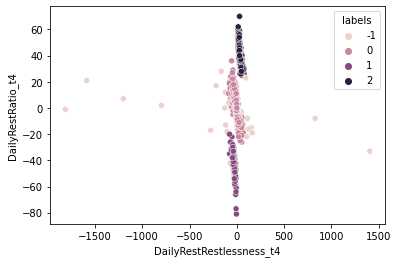

15 6
15 7
15 8
15 9
15 10
15 11
15 12
15 13
15 14
15 15
15 16
15 17
16 5
New Min:  22 16 5


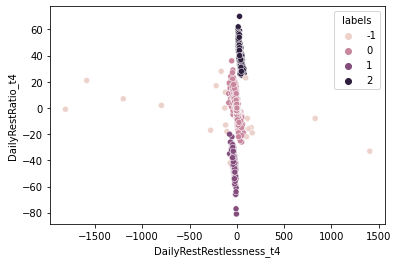

16 6
16 7
16 8
16 9
16 10
16 11
16 12
16 13
16 14
16 15
16 16
16 17
17 5
New Min:  21 17 5


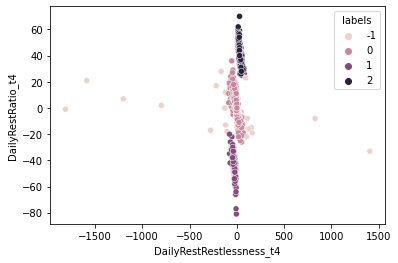

17 6
17 7
17 8
17 9
17 10
17 11
17 12
17 13
17 14
17 15
17 16
17 17
18 5
New Min:  20 18 5


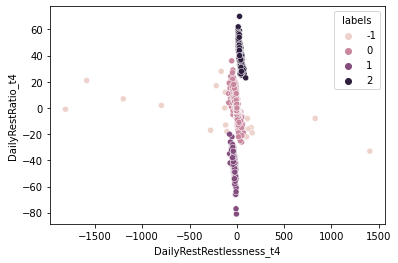

18 6
18 7
18 8
18 9
18 10
18 11
18 12
18 13
18 14
18 15
18 16
18 17
19 5
19 6
19 7
19 8
19 9
19 10
19 11
19 12
19 13
19 14
19 15
19 16
19 17
20 5
20 6
20 7
20 8
20 9
20 10
20 11
20 12
20 13
20 14
20 15
20 16
20 17
21 5
21 6
21 7
21 8
21 9
21 10
21 11
21 12
21 13
21 14
21 15
21 16
21 17
22 5
22 6
22 7
22 8
22 9
22 10
22 11
22 12
22 13
22 14
22 15
22 16
22 17
23 5
23 6
23 7
23 8
23 9
23 10
23 11
23 12
23 13
23 14
23 15
23 16
23 17
24 5
24 6
24 7
24 8
24 9
24 10
24 11
24 12
24 13
24 14
24 15
24 16
24 17


,var1,var2,min_inv,min_epc,min_samples
0,DailyRestRestlessness_t4,DailyRestRatio_t4,23,15,5
1,DailyRestRestlessness_t4,DailyRestRatio_t4,22,16,5
2,DailyRestRestlessness_t4,DailyRestRatio_t4,21,17,5
3,DailyRestRestlessness_t4,DailyRestRatio_t4,20,18,5


In [20]:
## dbscan_list[7]
get_min_dbscan(df_orig, v1=dbscan_list[7][0], v2= dbscan_list[7][1], eps_range= range(15,25,1), min_sample_range= range(5,18,1))
## 18 5

In [21]:
labels, groups, inv = get_dbscan(df=df_orig, c1=dbscan_list[7][0], c2=dbscan_list[7][1],eps=18,min_samples=5)
a = pd.DataFrame(labels, index=df_orig.index, columns=['dbscan7'])
print(a.value_counts())
print(a.index)
df = df.merge(right= a, how='left', left_index= True, right_index=True)
print(df.shape)

dbscan7
 0         3014
 2          212
 1          191
-1           20
dtype: int64
RangeIndex(start=0, stop=3437, step=1)
(3346, 240)


DailyRestRatio_t4 DailyRestPerBout_t4
5 20
New Min:  390 5 20


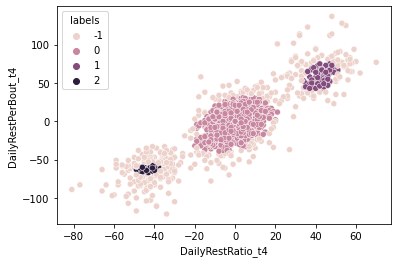

5 21
5 22
5 23
5 24
5 25
5 26
5 27
5 28
5 29
6 20
New Min:  270 6 20


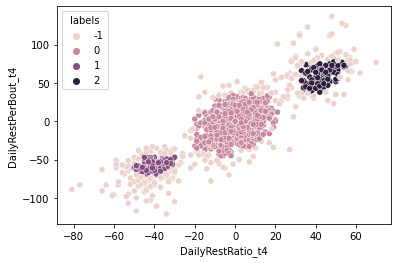

6 21
6 22
6 23
6 24
6 25
6 26
6 27
6 28
6 29
7 20
New Min:  171 7 20


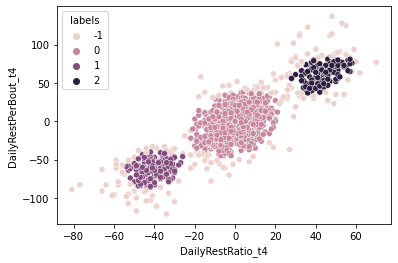

7 21
7 22
7 23
7 24
7 25
7 26
7 27
7 28
7 29
8 20
New Min:  101 8 20


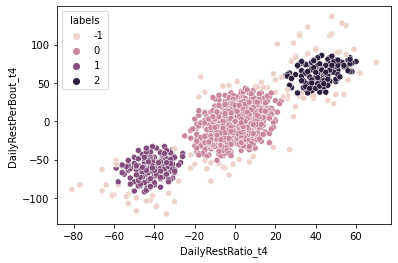

8 21
8 22
8 23
8 24
8 25
8 26
8 27
8 28
8 29
9 20
New Min:  74 9 20


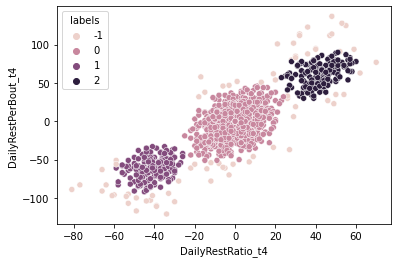

9 21
9 22
9 23
9 24
9 25
9 26
9 27
9 28
9 29
10 20
New Min:  50 10 20


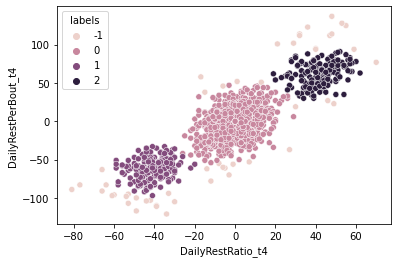

10 21
10 22
10 23
10 24
10 25
10 26
10 27
10 28
10 29
11 20
11 21
11 22
11 23
11 24
11 25
11 26
11 27
11 28
11 29
12 20
12 21
12 22
12 23
12 24
12 25
12 26
12 27
12 28
12 29
13 20
13 21
13 22
13 23
13 24
13 25
13 26
13 27
13 28
13 29
14 20
14 21
14 22
14 23
14 24
14 25
14 26
14 27
14 28
14 29


,var1,var2,min_inv,min_epc,min_samples
0,DailyRestRatio_t4,DailyRestPerBout_t4,390,5,20
1,DailyRestRatio_t4,DailyRestPerBout_t4,270,6,20
2,DailyRestRatio_t4,DailyRestPerBout_t4,171,7,20
3,DailyRestRatio_t4,DailyRestPerBout_t4,101,8,20
4,DailyRestRatio_t4,DailyRestPerBout_t4,74,9,20
5,DailyRestRatio_t4,DailyRestPerBout_t4,50,10,20


In [22]:
## dbscan_list[8]
get_min_dbscan(df_orig, v1=dbscan_list[8][0], v2= dbscan_list[8][1], eps_range= range(5,15,1), min_sample_range= range(20,30,1))
# 10 20

In [23]:
labels, groups, inv = get_dbscan(df=df_orig, c1=dbscan_list[8][0], c2=dbscan_list[8][1],eps=10,min_samples=20)
a = pd.DataFrame(labels, index=df_orig.index, columns=['dbscan8'])
print(a.value_counts())
print(a.index)
df = df.merge(right= a, how='left', left_index= True, right_index=True)
print(df.shape)

dbscan8
 0         3016
 2          198
 1          173
-1           50
dtype: int64
RangeIndex(start=0, stop=3437, step=1)
(3346, 241)


DailyRestRestlessness_t4 DailyRestTime_t4
85 40
New Min:  29 85 40


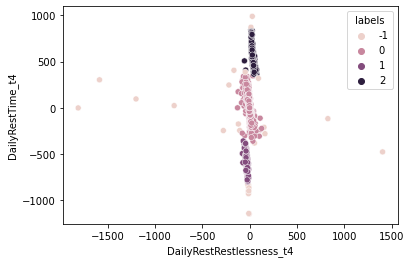

85 41
85 42
85 43
85 44
85 45
85 46
85 47
85 48
85 49
86 40
New Min:  28 86 40


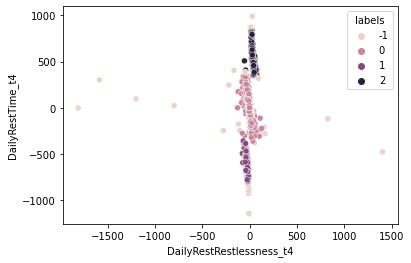

86 41
86 42
86 43
86 44
86 45
86 46
86 47
86 48
86 49
87 40
New Min:  26 87 40


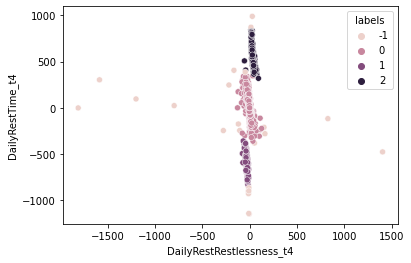

87 41
87 42
87 43
87 44
87 45
87 46
87 47
87 48
87 49
88 40
New Min:  24 88 40


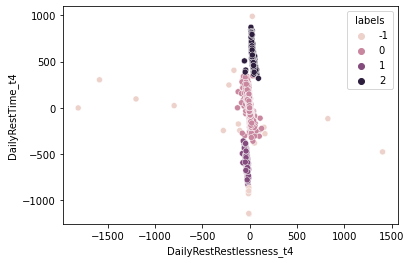

88 41
88 42
88 43
88 44
88 45
88 46
88 47
88 48
88 49
89 40
89 41
89 42
89 43
89 44
89 45
89 46
89 47
89 48
89 49
90 40
90 41
90 42
90 43
90 44
90 45
90 46
90 47
90 48
90 49
91 40
New Min:  22 91 40


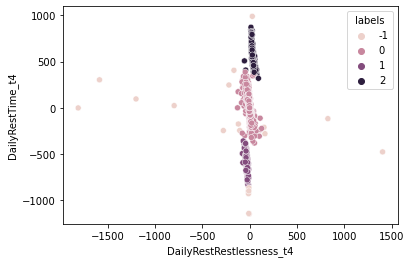

91 41
91 42
91 43
91 44
91 45
91 46
91 47
91 48
91 49
92 40
92 41
92 42
92 43
92 44
92 45
92 46
92 47
92 48
92 49
93 40
93 41
93 42
93 43
93 44
93 45
93 46
93 47
93 48
93 49
94 40
New Min:  20 94 40


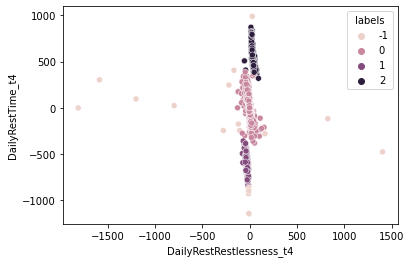

94 41
94 42
94 43
94 44
94 45
94 46
94 47
94 48
94 49


,var1,var2,min_inv,min_epc,min_samples
0,DailyRestRestlessness_t4,DailyRestTime_t4,29,85,40
1,DailyRestRestlessness_t4,DailyRestTime_t4,28,86,40
2,DailyRestRestlessness_t4,DailyRestTime_t4,26,87,40
3,DailyRestRestlessness_t4,DailyRestTime_t4,24,88,40
4,DailyRestRestlessness_t4,DailyRestTime_t4,22,91,40
5,DailyRestRestlessness_t4,DailyRestTime_t4,20,94,40


In [24]:
dbscan_list[9]
get_min_dbscan(df_orig, v1=dbscan_list[9][0], v2= dbscan_list[9][1], eps_range= range(85,95,1), min_sample_range= range(40,50,1))
#94 40

In [25]:
labels, groups, inv = get_dbscan(df=df_orig, c1=dbscan_list[9][0], c2=dbscan_list[9][1],eps=94,min_samples=40)
a = pd.DataFrame(labels, index=df_orig.index, columns=['dbscan9'])
print(a.value_counts())
print(a.index)
df = df.merge(right= a, how='left', left_index= True, right_index=True)
print(df.shape)

dbscan9
 0         3026
 2          209
 1          182
-1           20
dtype: int64
RangeIndex(start=0, stop=3437, step=1)
(3346, 242)


DailyRestBout_t4 DailyRestPerBout_t4
5 15
New Min:  77 5 15


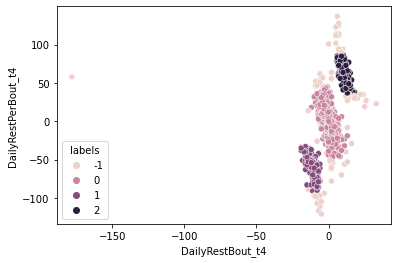

5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
6 15
New Min:  55 6 15


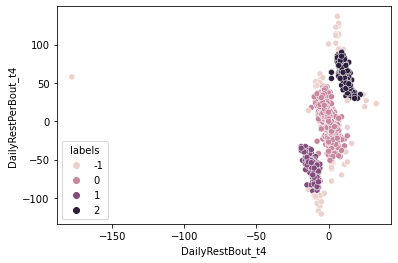

6 16
6 17
6 18
6 19
6 20
6 21
6 22
6 23
6 24
7 15
New Min:  39 7 15


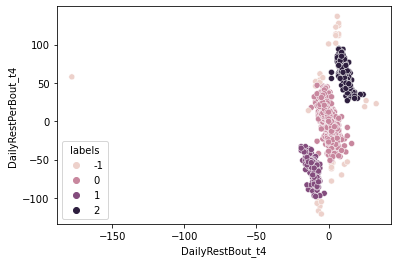

7 16
7 17
7 18
7 19
7 20
7 21
7 22
7 23
7 24
8 15
8 16
8 17
8 18
8 19
8 20
8 21
8 22
New Min:  37 8 22


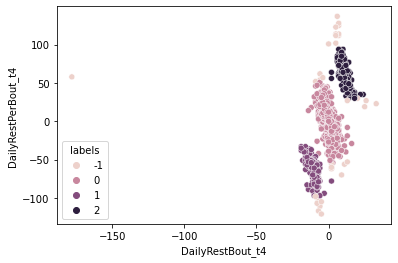

8 23
8 24
9 15
9 16
9 17
9 18
9 19
9 20
9 21
9 22
9 23
9 24
10 15
10 16
10 17
10 18
10 19
10 20
10 21
10 22
10 23
10 24
11 15
11 16
11 17
11 18
11 19
11 20
11 21
11 22
11 23
11 24
12 15
12 16
12 17
12 18
12 19
12 20
12 21
12 22
12 23
12 24
13 15
13 16
13 17
13 18
13 19
13 20
13 21
13 22
13 23
13 24
14 15
14 16
14 17
14 18
14 19
14 20
14 21
14 22
14 23
14 24


,var1,var2,min_inv,min_epc,min_samples
0,DailyRestBout_t4,DailyRestPerBout_t4,77,5,15
1,DailyRestBout_t4,DailyRestPerBout_t4,55,6,15
2,DailyRestBout_t4,DailyRestPerBout_t4,39,7,15
3,DailyRestBout_t4,DailyRestPerBout_t4,37,8,22


In [26]:
## dbscan_list[10]
get_min_dbscan(df_orig, v1=dbscan_list[10][0], v2= dbscan_list[10][1], eps_range= range(5,15,1), min_sample_range= range(15,25,1))
#8 22

In [27]:
labels, groups, inv = get_dbscan(df=df_orig, c1=dbscan_list[10][0], c2=dbscan_list[10][1],eps=8,min_samples=22)
a = pd.DataFrame(labels, index=df_orig.index, columns=['dbscan10'])
print(a.value_counts())
print(a.index)
df = df.merge(right= a, how='left', left_index= True, right_index=True)
print(df.shape)

dbscan10
 0          3016
 2           199
 1           185
-1            37
dtype: int64
RangeIndex(start=0, stop=3437, step=1)
(3346, 243)


In [28]:
from sklearn.linear_model import LogisticRegression
c1, c2 = dbscan_list[10]
X = df_orig[[c1,c2]]
y = a
mod10 = LogisticRegression(max_iter= 1000, random_state= 1).fit(X,y)
mod10.coef_

array([[-1.85801147e-01,  2.74361545e-02],
       [-7.19365739e-03, -8.08954442e-05],
       [-2.68735408e-01, -9.09725692e-02],
       [ 4.61730213e-01,  6.36173102e-02]])

In [29]:

c1i = c1 + 'i'
c2i = c2 + 'i'
print(df[[c1i,c2i]])


      DailyRestBout_t4i  DailyRestPerBout_t4i
0                   1.0                  -9.5
1                  -0.5                   7.5
2                   1.0                  -4.0
3                   1.5                  -9.0
4                   0.5                  -1.0
...                 ...                   ...
3432                0.5                  -4.5
3433                0.0                   2.5
3434                0.0                   3.0
3435                1.0                  -0.5
3436                1.0                   4.0

[3346 rows x 2 columns]


## One hot Encoding

In [30]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3346 entries, 0 to 3436
Data columns (total 243 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   CowID                             object 
 1   FarmCowID                         object 
 2   BirthDate                         object 
 3   CalvingDate                       object 
 4   Cur_Date                          object 
 5   CurrentConceivedDate              object 
 6   TenDaysAvgECM_KG_t1_cat           float64
 7   DailyRestTime_t6_cat              float64
 8   DailyRestTime_t5_cat              float64
 9   DailyRestTime_t3_cat              float64
 10  DailyRestRestlessness_t5_cat      float64
 11  DailyRestRestlessness_t3_cat      float64
 12  DailyRestRestlessness_t1_cat      float64
 13  DailyRestRatio_t5_cat             float64
 14  DailyRestRatio_t3_cat             float64
 15  DailyRestTime_t7                  Int64  
 16  DailyRestBout                     float64

In [31]:
cat_list = [
    'FarmCode'
    ,'TenDaysAvgECM_KG_t1_cat'
    ,'DailyRestTime_t6_cat'              
    ,'DailyRestTime_t5_cat'              
    ,'DailyRestTime_t3_cat'              
    ,'DailyRestRestlessness_t5_cat'      
    ,'DailyRestRestlessness_t3_cat'      
    ,'DailyRestRestlessness_t1_cat'      
    ,'DailyRestRatio_t5_cat'             
    ,'DailyRestRatio_t3_cat'             
    ,'DailyRestTime_t7'                  
    ,'DailyMilkingTime_cat'              
    ,'DailyProdRate_t4_cat'              
    ,'DailyProtein_KG_t1_cat'            
    ,'ECM_KG_t5_cat'                     
    ,'DailyProtein_P_t6_cat'             
    ,'DailyYield_KG_t4_cat'              
    ,'LactationNumber'                   
    ,'PPUD'
    ,'Parity123'                         
    ,'Is_Ready_to_breed'     
    ,'Extended_Status'                   
    ,'Heifer_Extend_Status'              
    ,'Sys_Status'                        
    ,'Breed'                             
    ,'DateMonth'     
    ,'DailyRestBout_t3_cat'              
    ,'LastEdma_t1_t30i'                  
    ,'LastLAME_t1_t30i'                  
    ,'LastKET_t1_t30i'                   
    ,'LastPRO_t1_t30i'                   
    ,'LastLDA_t1_t30i'                   
    ,'LastMAST_t1_t30i'                  
    ,'LastMF_t1_t30i'                    
    ,'dbscan0'     
    ,'dbscan2'                             
    ,'dbscan5'                             
    ,'dbscan6'                             
    ,'dbscan7'                             
    ,'dbscan8'                             
    ,'dbscan9'                             
    ,'dbscan10'                                            
]

In [32]:
for col in cat_list:
    df[col] = df[col].astype('category')

In [33]:
df.select_dtypes('category').info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3346 entries, 0 to 3436
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   TenDaysAvgECM_KG_t1_cat       3346 non-null   category
 1   DailyRestTime_t6_cat          3346 non-null   category
 2   DailyRestTime_t5_cat          3346 non-null   category
 3   DailyRestTime_t3_cat          3346 non-null   category
 4   DailyRestRestlessness_t5_cat  3346 non-null   category
 5   DailyRestRestlessness_t3_cat  3346 non-null   category
 6   DailyRestRestlessness_t1_cat  3346 non-null   category
 7   DailyRestRatio_t5_cat         3346 non-null   category
 8   DailyRestRatio_t3_cat         3346 non-null   category
 9   DailyRestTime_t7              3346 non-null   category
 10  DailyMilkingTime_cat          3346 non-null   category
 11  DailyProdRate_t4_cat          3346 non-null   category
 12  DailyProtein_KG_t1_cat        3346 non-null   ca

In [35]:
df_w_dummies = pd.get_dummies(df, columns= cat_list, dtype='category')

TypeError: data type 'category' not understood

In [ ]:
df_w_dummies.head()

In [ ]:
df_w_dummies.shape

In [ ]:
df_w_dummies.info(verbose=True)

In [ ]:
df_w_dummies.to_pickle(r'C:\DataScience\PROJECT_AFIMILK\Data\Flat_File_for_cleansing\df_clean_w_dummies.p')